Carles Falcó i Gandia

7621931

falcoigandia@ucsb.edu

In [1]:
from numpy import zeros, array, dot, linspace, sin, pi, concatenate
from numpy.linalg import norm
import matplotlib.pyplot as plt
from pandas import DataFrame

# Tridiagonal solver

In [2]:
# Solving tridiagonal systems of linear equations

# Solving upper diagonal system Ux = y
# INPUT: U (linear system matrix, upper diagonal), 
# y (column vector)
# OUTPUT: x (unkowns column vector)
# Carles Falcó i Gandia
# 14/11/18
def linear_u_solver(U,y):
    x = zeros( len(y) )
    for i in range(len(y)-1,-1,-1):
        coef = [U[i][j]*x[j] for j in range(len(y)-1,i,-1)]
        x[i] = ( y[i]-sum(coef) )/U[i][i]
    return x

# Solving lower diagonal system Lx = y
# INPUT: L (linear system matrix, lower diagonal), 
# y (column vector)
# OUTPUT: x (unkowns column vector)
# Carles Falcó i Gandia
# 14/11/18
def linear_l_solver(U,y):
    x = zeros( len(y) )
    for i in range(0,len(y)):
        coef = [U[i][j]*x[j] for j in range(0,i)]
        x[i] = ( y[i]-sum(coef) )/U[i][i]
    return x

# LU decomposition for tridiagonal system M = LU
# INPUT: M (tridiagonal matrix), L, U (zeros matrixes)
# OUTPUT: Filling L and U so that:
# L is lower diagonal 
# U is upper diagonal
# Carles Falcó i Gandia
# 14/11/18
def LU_dec_tri(M,L,U):
    U[0][0] = M[0][0]
    L[-1][-1] = 1
    for j in range(0,len(M)-1):
        L[j][j] = 1
        U[j][j+1] = M[j][j+1]
        L[j+1][j] = M[j+1][j]/U[j][j]
        U[j+1][j+1] = M[j+1][j+1] - L[j+1][j]*M[j][j+1]

# Solving a tridiagonal system Mx = y
# INPUT: A (tridiagonal matrix), y (column vector)
# OUTPUT: x (unknown column vector)
# Carles Falcó i Gandia
# 14/11/18
def linear_tri_solver(M,y):
    L = zeros( (len(M),len(M)) )
    U = zeros( (len(M),len(M)) )
    LU_dec_tri(M,L,U)
    u = linear_l_solver(L,y)
    x = linear_u_solver(U,u)
    return x

(b) We can test our code with $$\begin{bmatrix}
    1 & 2 & 0 & 0 \\
     2 & 1 & 2 & 0 \\
      0 & 2 & 1 & 2 \\
       0 & 0 & 2 & 1 \\ 
\end{bmatrix}x=\begin{bmatrix}
    5  \\
     0  \\
      1 \\
       0 \\
\end{bmatrix}$$

In [3]:
m_1 = array([[1.,2.,0.,0.],[2.,1.,2.,0.],[0.,2.,1.,2.],[0.,0.,2.,1.]])
y_1 = array([5.,0.,1.,0.])

x_1 = linear_tri_solver(m_1,y_1)
print('Solution to Ax = b')
print(x_1)

print('\nThe product Ax gives us')
print(dot(m_1,x_1))

Solution to Ax = b
[-6.2  5.6  3.4 -6.8]

The product Ax gives us
[  5.00000000e+00   1.77635684e-15   1.00000000e+00   0.00000000e+00]


# 1D Boundary value problem

$$-u''+\pi^2u=2\pi^2\sin(\pi x),\;\;\;0<x<1$$
$$u(0) = u(1) = 0$$

(a) Numerical approximation to the solution. We'll approximate the second derivative by a second order finite difference and use a grid of $N+1$ points. Approximating $v_j \approx u(x_j$ we need to solve the linear system:
$$\frac{-v_{j-1}+2v_j-v_{j+1}}{h^2}+\pi^2v_j = 2\pi^2\sin(\pi x_j),\;\;\; j = 1,\ldots,N-1$$
and $v_0 = v_N = 0$.

Equivalently:
$$\frac{1}{2\pi^2h^2}\begin{bmatrix}
    2+h^2\pi^2 & -1 & 0   & \dots  & 0   \\
     -1 &    2+h^2\pi^2    & -1   & \dots  & 0   \\
     0 &      \ddots   & \ddots & \ddots    & \vdots    \\
      \vdots &         &  &    & \vdots    \\
      &         &      -1     &     2+h^2\pi^2    & -1   \\
      0&         &        0   &      -1     & 2+h^2\pi^2 \\
  \end{bmatrix}\begin{bmatrix}
  v_1 \\
  v_2 \\
 \vdots \\
 \\\vdots \\
 v_{N-1}\\
  \end{bmatrix} = \begin{bmatrix}
  \sin(\pi x_1) \\
  \sin(\pi x_2)\\
 \vdots \\
 \\\vdots \\
 \sin(\pi x_{N-1})\\
  \end{bmatrix}$$
  
  We'll use our tridiagonal solver

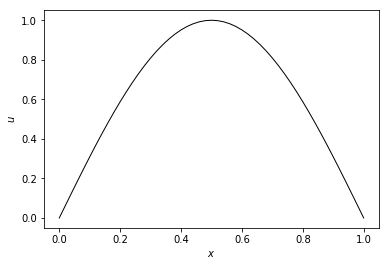

In [4]:
# Solving bvp problem
# INPUT: N (grid dim)
# OUTPUT: u (approximated solution)
# Carles Falcó i Gandia
# 02/23/2019
    
def bvp_solver(N):
    x = linspace(0,1,N + 1)
    h = 1/N
    A = zeros((N - 1, N - 1))
    for i in range(0, N - 1):
        A[i,i] = 2 + h**2*pi**2
        if i > 0:
            A[i, i - 1] = -1
            A[i - 1, i] = -1
    return linear_tri_solver(1/2/h**2/pi**2*A, sin(pi*x)[1:-1])

# If N = 50
N1 = 50
u1 = concatenate([[0],bvp_solver(N1),[0]])
x1 = linspace(0,1,N1 + 1)

# Plotting results

plt.plot(x1,u1, color = 'black', linewidth = 1)
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.show()

(b) Exact solution is $u(x) = \sin(\pi x)$. This is easy to check since:
$$u(0) = \sin(0) = u(1) = \sin(\pi) = 0$$
$$u''(x) = -\pi^2u(x)\implies -u''+\pi^2u = 2\pi^2 u = 2\pi^2\sin(\pi x)$$

(c) Computing error in the $2$-norm. We'll solve again the linear system and we'll compare the errors for $N = 50,100$. Since expected numerical error is $O(h^2) = O(N^{-2})$, by doubling N we expect the error to become 4 times smaller.

In [5]:
# Solutions for N = 100
N2 = 100
u2 = concatenate([[0],bvp_solver(N2),[0]])

# Exact solutions
u1r = sin(pi*linspace(0,1,N1 + 1))
u2r = sin(pi*linspace(0,1,N2 + 1))

# Errors
data = {'$N$':[N1,N2], 'Error': [norm(u1r-u1),norm(u2r-u2)] }
DataFrame(data)

,$N$,Error
0,50,0.000822
1,100,0.000291


We have then an error $\sim 0.0035$ times smaller. This is slightly worse than what we expected.

(d) In real applications we don't know the exact solution, but if we can compute the approximated solution for different $N$ we can estimate when we are close to the exact solution. If $v^{(N)}$ is the approximated solution for a grid of $N$ nodes, we can increase sequentially this $N$ to $N'$ - by a factor of 2, 10 for instance - and check if the relative error is smaller than a fixed tolerance $\epsilon$, this is:
$$\frac{\|v^{(N)}-v^{(N')}\|_{\infty}}{v^{(N')}}\leq\epsilon$$
If we increase $N$ always by the same factor we can easily estimate the rate of convergence.

One issue can come up from this, because the discretized approximations $v^{(N)},v^{(N')}$ don't have the same dimension. However one could consider only the components of each solution corresponding to common points. A better solution would be, give the approximated solution in the form of a spline and then calculate this relative error.

# Jacobi and Gauss-Seidel iterations

for the system:
$$\begin{bmatrix}
    1 & -2 & 1 \\
     2 & 1 & -3 \\
      1 & -1 & 1 \\ 
\end{bmatrix}\begin{bmatrix}
    x_1  \\
     x_2 \\
      x_3 \\
\end{bmatrix} = \begin{bmatrix}
    -1 \\
     3 \\
      0 \\
\end{bmatrix}$$

(a) Two first Jacobi iterations. The Jacobi iterations are defined by:
$$
\begin{bmatrix}
    x_1^{(k+1)}  \\
     x_2^{(k+1)} \\
      x_3^{(k+1)} \\
\end{bmatrix} = \begin{bmatrix}
    0 & 2 & -1 \\
     -2 & 0 & 3 \\
      -1 & 1 & 0 \\ 
\end{bmatrix}\begin{bmatrix}
    x_1^{(k)}  \\
     x_2^{(k)} \\
      x_3^{(k)} \\
\end{bmatrix} + \begin{bmatrix}
    -1 \\
     3 \\
      0 \\
\end{bmatrix}
\Leftrightarrow\mathbf{x}^{(k+1)} = N\mathbf{x}^{(k)}+\mathbf{b}$$
Starting with an initial guess $\mathbf{x}^{(0)} = \mathbf{0}$ we have $\mathbf{x}^{(2)} = N\mathbf{x}^{(1)}+\mathbf{b} = N\mathbf{b}+\mathbf{b}$:
$$ \mathbf{x}^{(2)} = \begin{bmatrix}
    1 & 2 & -1 \\
     -2 & 1 & 3 \\
      -1 & 1 & 1 \\ 
\end{bmatrix}\begin{bmatrix}
    -1 \\
     3 \\
      0 \\
\end{bmatrix} = \begin{bmatrix}
    5 \\
     5 \\
      4 \\
\end{bmatrix}$$
(b) Two first Gauss-Seidel iterations. They're defined by:
$$x_1^{(k+1)} =  2x_2^{(k)} - x_3^{(k)} -1 $$
$$x_2^{(k+1)} =  -2x_1^{(k+1)} +3x_3^{(k)} +3 $$
$$x_3^{(k+1)} =  -x_1^{(k+1)} + x_2^{(k+1)} $$
Using the same initial guess:
$$x_1^{(1)} =  -1 $$
$$x_2^{(1)} =  2  +3 = 5$$
$$x_3^{(1)} =  1 +5 = 6 $$
and the second iteration gives us:
$$x_1^{(2)} =  10 - 6 -1 = 3$$
$$x_2^{(2)} =  -6 + 18 +3 = 15$$
$$x_3^{(2)} =  -3 + 15 = 12 $$

(c) Which one is closer to the exact solution $\mathbf{x} = (1,1,0)$? We'll use the 2-norm to estimate which one is closer.
$$\|\mathbf{x} -\mathbf{x}_j\| = 4\sqrt{3}$$
$$\|\mathbf{x} -\mathbf{x}_{gs}\| = \sqrt{344}$$

so after two iterations the approximation given by the Jacobi iteration method is closer to the exact solution.

# Convergence of Jacobi and Gauss-Seidel methods

for the system:
$$2x_1-x_2+x_3 = -1$$
$$2x_1+2x_2+2x_3 = 4$$
$$-x_1-x_2+2x_3 = -5$$

The matrices $$M\mathbf{x}^{(k+1)} = N\mathbf{x}^{(k)} +b$$ for the Jacobi and Gauss-Seidel methods are:
$$M_j = \begin{bmatrix}
    2 & 0 & 0 \\
     0 & 2 & 0 \\
      0 & 0 & 2 \\ 
        \end{bmatrix}\;\;\;\; N_j = \begin{bmatrix}
    0 & 1 & -1 \\
     -2 & 0 & -2 \\
      1 & 1 & 0 \\ 
\end{bmatrix}$$
$$M_{gs} = \begin{bmatrix}
    2 & 0 & 0 \\
     2 & 2 & 0 \\
      -1 & -1 & 2 \\ 
        \end{bmatrix}\;\;\;\; N_{gs} = \begin{bmatrix}
    0 & 1 & -1 \\
     0 & 0 & -2 \\
      0 & 0 & 0 \\ 
\end{bmatrix}$$

The inverses of the $M$ matrices can be easily found:
$$M_j^{-1} = \begin{bmatrix}
    1/2 & 0 & 0 \\
     0 & 1/2 & 0 \\
      0 & 0 & 1/2 \\ 
        \end{bmatrix},\;\;M_{gs}^{-1} = \begin{bmatrix}
    1/2 & 0 & 0 \\
     -1/2 & 1/2 & 0 \\
      0 & 1/4 & 1/2 \\ 
        \end{bmatrix}$$
        
And now:
$$T_{gs} = M_{gs}^{-1}N_{gs} = \begin{bmatrix}
    1/2 & 0 & 0 \\
     -1/2 & 1/2 & 0 \\
      0 & 1/4 & 1/2 \\ 
        \end{bmatrix}\begin{bmatrix}
    0 & 1 & -1 \\
     0 & 0 & -2 \\
      0 & 0 & 0 \\ 
\end{bmatrix} = \begin{bmatrix}
    0 & 1/2 & -1/2 \\
     0 & -1/2 & -1/2 \\
      0 & 0 & -1/2 \\ 
\end{bmatrix}$$
which is an upper triangular matrix. Its eigenvalues are in the diagonal and hence $\rho(T_{gs})=1/2<1$ proving that the Gauss-Seidel method converges for this linear system. On the other hand:
$$T_{j} = M_j^{-1}N_{j} = \begin{bmatrix}
    1/2 & 0 & 0 \\
     0 & 1/2 & 0 \\
      0 & 0 & 1/2 \\ 
        \end{bmatrix}\begin{bmatrix}
    0 & 1 & -1 \\
     -2 & 0 & -2 \\
      1 & 1 & 0 \\ 
\end{bmatrix}=\begin{bmatrix}
    0 & 1/2 & -1/2 \\
     -1 & 0 & -1 \\
      1/2 & 1/2 & 0 \\ 
\end{bmatrix}$$
Its characteristic polynomial is: $x^3 + 5x/4\implies \rho(T_{j}) = \sqrt{5}/2>1$ which means that the Jacobi method diverges.